# Plot the data of "ion1testold"

 Import Packets and Set Gengeric Information, parameters

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator
import os
plt.rcParams['ytick.right']  =plt.rcParams['xtick.top'] =True
xminorLocator=MultipleLocator(2)
#plt.rcParams['set_minor_locator']=xminorLocator
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Time New Rroman"]})
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    #"font.serif": ["Palatino"],
    "font.serif": ["Time New Roman"], 
})
# It's also possible to use the reduced notation by directly setting font.family:
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Time New Roman",
  "font.size": 8,
})

def cm_to_inch(value):
    return value/2.54

plt.rcParams['figure.figsize'] = (cm_to_inch(8), cm_to_inch(6.5))
#plt.rcParams['figure.figsize'] =(4,3)#(3.5,2.5)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
from mpl_toolkits.mplot3d import Axes3D
import numpy 
def setlabel(ax, label, loc=2, borderpad=0.6, **kwargs):
    legend = ax.get_legend()
    if legend:
        ax.add_artist(legend)
    line, = ax.plot(numpy.NaN,numpy.NaN,color='none',label=label)
    label_legend = ax.legend(handles=[line],
                             loc=[-0.15,1.001],
                             handlelength=0,
                             handleheight=0,
                             handletextpad=0,
                             borderaxespad=0,
                             borderpad=borderpad,
                             frameon=False,
                             **kwargs)
    label_legend.remove()
    ax.add_artist(label_legend)
    line.remove()
def setlabelm(ax, label, loc, borderpad=0.6, **kwargs):
    legend = ax.get_legend()
    if legend:
        ax.add_artist(legend)
    line, = ax.plot(numpy.NaN,numpy.NaN,color='none',label=label)
    label_legend = ax.legend(handles=[line],
                             loc=loc,
                             handlelength=0,
                             handleheight=0,
                             handletextpad=0,
                             borderaxespad=0,
                             borderpad=borderpad,
                             frameon=False,
                             **kwargs)
    label_legend.remove()
    ax.add_artist(label_legend)
    line.remove()
levels=100
figureDPI=300
figureType="jpeg"
timeUnit="fs"

In [2]:
dir='D:\\doc\\data\\ion1test\\twopump\\2083\\'
# dir='D:\\dataofpro\\'
print('Working directory',dir)
print("\n")
f=open(dir+"alog.dat",encoding="utf-8")
print(f.read(1500))

Working directory D:\doc\data\ion1test\twopump\2083\


 Date and time of begin: 2022/ 9/18  18:26:19
 --The calculation starts at   0.0000000000000000      femtoseconds and ends at   200.10000298172238      femtoseconds
 |----- Quantization parameter -----|
 dt in fs    0.10000
  n_dt=        2001
  Calculated time boundary at           0           0        2001
  Calculated time boundary at   0.0000000000000000      fs
         nr=       128       nj=        60     trux=        15       nn=       900
       xmin=   1.75000     xmax=  20.00000       dx=   0.14258
 |-----  Molecular parameters  -----|
  Reduced mass        =   1604.3258056640625      a.u.
  Rotation coefficient=   7.5100002288818359      1/cm
 Absorbing boundary   1.0000000000000000      :   19.500000000000000     
 --Set pulses data by set_pulse.in
       E-field(V/m)    Frequency(1/cm)    Center time(fs)           FWHM(fs)          Phase(pi)
 |----- Laser pulse parameters -----|
       E-field(V/m)    Frequency(1/cm) 

Get the time points from the data

In [3]:
# TimeTurn=-20
# turnPoint=0
if os.path.exists(dir+'laser.dat'):
    TimeBegin =(min(np.loadtxt(dir+'Laser.dat')[:,0]))
    TimeEnd   =(max(np.loadtxt(dir+'Laser.dat')[:,0]))
    dt=np.loadtxt(dir+'Laser.dat')[1,0]-np.loadtxt(dir+'Laser.dat')[0,0]
elif os.path.exists(dir+'laserField.dat'):
    TimeBegin =(min(np.loadtxt(dir+'Laserfield.dat')[:,0]))
    TimeEnd   =(max(np.loadtxt(dir+'Laserfield.dat')[:,0]))
    dt=np.loadtxt(dir+'LaserField.dat')[1,0]-np.loadtxt(dir+'LaserField.dat')[0,0]
else:
    print('Cant find the data file')
TimeTurn=(min(np.loadtxt(dir+'timeenergyspctra.dat')[:,0])) 
if TimeEnd<5:
    print('The unit of time is ps!')
    timeUnit="ps"
print(' dt= ',dt)
turnPoint =int((TimeTurn-TimeBegin)/dt)
print(' TurnPoint=',turnPoint)
print(' Begin time:',TimeBegin,timeUnit+'\n End time  :',TimeEnd,timeUnit+' \n Turn time :',TimeTurn,timeUnit)

 dt=  0.100000001490116
 TurnPoint= 1
 Begin time: 0.0 fs
 End time  : 200.000002980232 fs 
 Turn time : 0.10000000149011613 fs


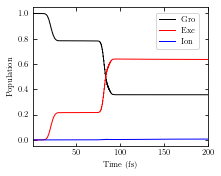

In [4]:
if os.path.exists(dir+"popu.dat"):
    data=np.loadtxt(dir+"Popu.dat")
elif os.path.exists(dir+"PopulationOfState.dat"):
    data = np.loadtxt(dir+"PopulationOfState.dat")
else:
    print("No PopulationOfState dataset found.")
plt.xlim(TimeTurn,TimeEnd)
ax=plt.plot(data[:,0],data[:,1],'k-',data[:,0],data[:,2],'r-',data[:,0],1-data[:,1]-data[:,2],'b-')
plt.legend(["Gro","Exc","Ion"],loc=(0.7,0.70))
plt.xlabel("Time ("+timeUnit+")")
plt.ylabel("Population")
plt.savefig(dir+"PopulationOfState."+figureType,dpi=figureDPI,bbox_inches="tight")

In [5]:
if os.path.exists(dir+"popu.dat"):
    data=np.loadtxt(dir+"Popu.dat")
elif os.path.exists(dir+"PopulationOfState.dat"):
    data = np.loadtxt(dir+"PopulationOfState.dat")
else:
    print("No PopulationOfState dataset found.")
plt.figure(figsize=(16/2.54,6.5/2.54))
plt.subplot(1,2,1)
plt.xlim(TimeTurn,TimeEnd)
ax=plt.plot(data[:,0],data[:,1],'k-',data[:,0],data[:,2],'r--',data[:,0],1-data[:,1]-data[:,2],'b-.')
plt.legend(["Gro","Exc","Ion"],loc=(0.65,0.70))
plt.xlabel("Time ("+timeUnit+")")
plt.ylabel("Population")
plt.subplot(1,2,2)
data =np.loadtxt(dir+"timeenergyspctra.dat")
#DataAng=scipy.ndimage.zoom(DataAng,1)
#plt.style.use('_mpl-gallery-nogrid')
l=np.argmax(data[:,2])
x=data[l-10:l+90,1]
print(l)
y=data[l-10:l+90,2]
x1=np.arange(min(x),max(x),(max(x)-min(x))/200)
from scipy import interpolate
y1=interpolate.interp1d(x,y,kind='cubic')(x1)
# plt.xlim(-5, 5)
#plt.ylim(-0.009, 0.1)
plt.plot(x1,y1,'k')
plt.text(0.2*(max(x)-min(x)),0.8*(max(y)-min(y)),'(1+1)-REMPI')
plt.text(0.5*(max(x)-min(x)),0.2*(max(y)-min(y)),'(1+2)-REMPI')
#interpolation='spline16'
plt.xlabel("Energy (eV)")
plt.ylabel("Intensity (arb.units)")
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.3)
plt.savefig(dir+"PopulationEnergyspctra."+figureType,bbox_inches = 'tight',transparent=True,dpi=figureDPI)
plt.show()

93928


<Figure size 680.315x510.236 with 0 Axes>

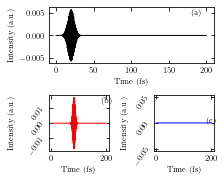

In [ ]:
plt.figure(figsize=(cm_to_inch(24),cm_to_inch(18)))
data=np.loadtxt(dir+"Laser.dat")
x =data[:,0]
y1=data[:,1]
x2=data[turnPoint:,0]
y2=data[turnPoint:,2]
y3=data[turnPoint:,3]
import matplotlib.gridspec as gridspec
fig = plt.figure(tight_layout=True)
gs = gridspec.GridSpec(2, 2)
ax = fig.add_subplot(gs[0,:])
ax.plot(x,y1,'k-')#
#ax.set_xlim([-10,100])
x=x
y=y1
plt.text(min(x)+(max(x)-min(x))*0.9,min(y)+(max(y)-min(y))*0.9,"(a)")
ax.set_ylabel('Intensity (a.u.)')
ax.set_xlabel('Time (fs)')
for i in range(2):
    ax = fig.add_subplot(gs[1, i])
    if i==0:
        ax.plot(x2,y2,'r-')
        x=x2
        y=y2
        plt.text(min(x)+(max(x)-min(x))*0.9,min(y)+(max(y)-min(y))*0.9,"(b)")
    if i==1:
        ax.plot(x2,y3,'b-')
        x=x2
        y=y3
        plt.text(min(x)+(max(x)-min(x))*0.9,min(y)+(max(y)-min(y))*0.9,"(c)")
    ax.set_ylabel('Intensity (a.u.)')
    ax.set_xlabel('Time (fs)')
    # if i == 0:
    for tick in ax.get_yticklabels():
        tick.set_rotation(55)
fig.align_labels()  # same as fig.align_xlabels(); fig.align_ylabels()
plt.show()

Plot the Potential energy and dipole moment

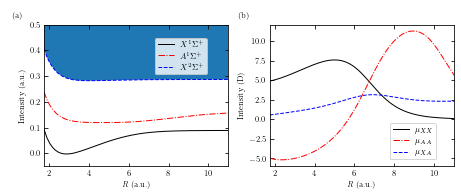

In [ ]:

plt.figure(figsize=(cm_to_inch(8*2),cm_to_inch(6.5)))
ax=plt.subplot(1,2,1)

if os.path.exists(dir+"pott.dat"):
    data=np.loadtxt(dir+"Pott.dat")
else:
    data=np.loadtxt(dir+"PotentialEnergy.dat")

x=data[:,0]
y1=data[:,1]
y2=data[:,2]
y3=data[:,3]
#plt.grid(False)
x=x
y=y3
setlabelm(ax,'(a)',[-0.2,1.001])
plt.xlabel('$\\textit{R}$ (a.u.)')
plt.ylabel("Intensity (a.u.)")
plt.plot(x,y1,'k-',x,y2,'r-.',x,y3,'b--')
plt.xlim(1.75,11)
plt.fill_between(x,y3,x,y3+0.2)
plt.ylim(-0.05,0.5)
plt.legend(['$X^1\\Sigma^+$','$A^1 \\Sigma ^+$','$X^2 \\Sigma ^+$'],loc=(0.6,0.65))
ax=plt.subplot(1,2,2)
if os.path.exists(dir+"Dipole.dat"):
    data=np.loadtxt(dir+"Dipole.dat")
else:
    data=np.loadtxt(dir+"DipoleMoment.dat")
setlabelm(ax,'(b)',[-0.2,1.001])
plt.xlabel("$\\textit{R}$  (a.u.)")
plt.ylabel("Intensity (D)")
plt.plot(data[:,0],data[:,1],'k-',data[:,0],data[:,2],'r-.',data[:,0],data[:,3],'b--')
plt.xlim(1.75,11)
plt.legend(["$\\mu_{XX} $","$\\mu_{AA} $","$\\mu_{XA} $"],loc=(0.65,0.05))
plt.tight_layout()
#plt.savefig(dir+"PotentialEnergyAndDipoleMent."+figureType,bbox_inches = 'tight',dpi=figureDPI)
plt.show()


Plot evolution of angle-resolved wave packets

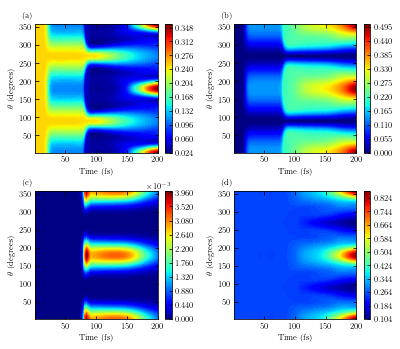

In [ ]:

import matplotlib.ticker
class OOMFormatter(matplotlib.ticker.ScalarFormatter):
    def __init__(self, order=0, fformat="%.3f", offset=True, mathText=True):
        self.oom = order
        self.fformat = fformat
        matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,useMathText=mathText)
    def _set_order_of_magnitude(self):
        self.orderOfMagnitude = self.oom
    def _set_format(self, vmin=None, vmax=None):
        self.format = self.fformat
        if self._useMathText:
             self.format = r'$\mathdefault{%s}$' % self.format
#plt.figure(figsize=(12,9))
plt.figure(figsize=(cm_to_inch(16),cm_to_inch(13)))
import matplotlib.ticker as ticker
if os.path.exists(dir+"vgr_ang.dat"):
    plt.subplot(2,2,1)
    DataAng =np.loadtxt(dir+"vgr_ang.dat")
    #plt.style.use('_mpl-gallery-nogrid')
    x=DataAng[:,0]
    y=DataAng[:,1]
    z=DataAng[:,2]
    plt.title("(a)",loc='left')
    plt.xlim(TimeBegin+1, TimeEnd )
    #plt.ylim(min(y),180)
    plt.tricontourf(x,y,z,levels,cmap='jet')
    plt.colorbar()
    plt.xlabel("Time ("+timeUnit+")")
    plt.ylabel("$\\theta$ (degrees)")
    plt.subplot(2,2,2)
    DataAng =np.loadtxt(dir+"Exc_ang.dat")
    #plt.style.use('_mpl-gallery-nogrid')
    x=DataAng[:,0]
    y=DataAng[:,1]
    z=DataAng[:,2]
    plt.title("(b)",loc='left')
    plt.xlim(TimeTurn+1,TimeEnd)
    #plt.ylim(min(y),180)
    plt.tricontourf(x,y,z,levels,cmap='jet')
    plt.colorbar()
    plt.xlabel("Time ("+timeUnit+")")
    plt.ylabel("$\\theta$ (degrees)")
    plt.subplot(2,2,3)
    DataAng =np.loadtxt(dir+"Ion_ang.dat")
    #plt.style.use('_mpl-gallery-nogrid')
    x=DataAng[:,0]
    y=DataAng[:,1]
    z=DataAng[:,2]
    plt.xlim(TimeTurn+1,TimeEnd)
    #plt.ylim(min(y),180)
    plt.title("(c)",loc='left')
    plt.tricontourf(x,y,z,levels,cmap='jet')
    plt.colorbar(format=OOMFormatter(-3, mathText=False))
    plt.xlabel("Time ("+timeUnit+")")
    plt.ylabel("$\\theta$ (degrees)")
    plt.subplot(2,2,4)
    DataAng =np.loadtxt(dir+"TotalAngDis.dat")
    #plt.style.use('_mpl-gallery-nogrid')
    x=DataAng[:,0]
    y=DataAng[:,1]
    z=DataAng[:,2]
    plt.title("(d)",loc='left')
    #plt.ylim(min(y),180)
    plt.tricontourf(x,y,z,levels,cmap='jet')
    #plt.colorbar(location='top',orientation='horizontal')
    plt.colorbar()
    plt.xlabel("Time ("+timeUnit+")")
    plt.ylabel("$\\theta$ (degrees)")
elif os.path.exists(dir+"GroAngWave.dat"):
    ax=plt.subplot(2,2,1)
    DataAng =np.loadtxt(dir+"GroAngWave.dat")
    #plt.style.use('_mpl-gallery-nogrid')
    x=DataAng[:,0]
    y=DataAng[:,1]
    z=DataAng[:,2]
    setlabel(ax,"(a)")
    plt.xlim(TimeBegin+1, TimeEnd )
    #plt.ylim(min(y),180)
    plt.tricontourf(x,y,z,levels,cmap='jet')
    plt.colorbar()
    plt.xlabel("Time ("+timeUnit+")")
    plt.ylabel("$\\theta$ (degrees)")
    ax=plt.subplot(2,2,2)
    DataAng =np.loadtxt(dir+"ExcAngWave.dat")
    #plt.style.use('_mpl-gallery-nogrid')
    x=DataAng[:,0]
    y=DataAng[:,1]
    z=DataAng[:,2]
    setlabel(ax,"(b)")
    plt.xlim(TimeTurn+1,TimeEnd)
    #plt.ylim(min(y),180)
    plt.tricontourf(x,y,z,levels,cmap='jet')
    plt.colorbar(format=OOMFormatter( mathText=False))
    plt.xlabel("Time ("+timeUnit+")")
    plt.ylabel("$\\theta$ (degrees)")
    ax=plt.subplot(2,2,3)
    DataAng =np.loadtxt(dir+"IonAngWave.dat")
    #plt.style.use('_mpl-gallery-nogrid')
    x=DataAng[:,0]
    y=DataAng[:,1]
    z=DataAng[:,2]
    plt.xlim(TimeTurn+1,TimeEnd)
    #plt.ylim(min(y),180)
    setlabel(ax,"(c)")
    plt.tricontourf(x,y,z,levels,cmap='jet')
    plt.colorbar(format=OOMFormatter(-3, mathText=False))
    plt.xlabel("Time ("+timeUnit+")")
    plt.ylabel("$\\theta$ (degrees)")
    ax=plt.subplot(2,2,4)
    DataAng =np.loadtxt(dir+"TotalAngDis.dat")
    #plt.style.use('_mpl-gallery-nogrid')
    x=DataAng[:,0]
    y=DataAng[:,1]
    z=DataAng[:,2]
    #plt.ylim(min(y),180)
    plt.tricontourf(x,y,z,levels,cmap='jet')
    
    plt.xlim(TimeTurn+1,TimeEnd)
    plt.colorbar()
    plt.xlabel("Time ("+timeUnit+")")
    plt.ylabel("$\\theta$ (degrees)")
    setlabel(ax,"(d)")
else :
    print("No data available")
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.3)
plt.savefig(dir+"WaveAngDis."+figureType,bbox_inches = 'tight',dpi=figureDPI)
plt.show()


Plot evolution of internuclear distance-resolved wave packages

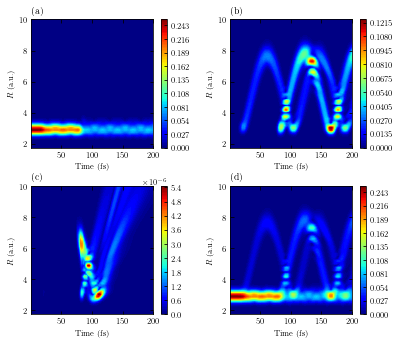

In [ ]:
plt.figure(figsize=((16/2.54),(13/2.54)))
import matplotlib.ticker as ticker
if os.path.exists(dir+"vgr_rad.dat"):     
    plt.subplot(2,2,1)
    DataAng =np.loadtxt(dir+"vgr_rad.dat")
    #plt.style.use('_mpl-gallery-nogrid')
    x=DataAng[:,0]
    y=DataAng[:,1]
    z=DataAng[:,2]
    plt.title("(a)",loc='left')
    plt.xlim(TimeTurn+1, TimeEnd )
    plt.ylim(1.75,10.0)
    plt.tricontourf(x,y,z,levels,cmap='jet')
    plt.colorbar()
    # cb=plt.colorbar(format='%.1e')
    # tick_locator = ticker.MaxNLocator(nbins=5)
    # cb.locator=tick_locator
    # cb.update_ticks()
    plt.xlabel("Time ("+timeUnit+")")
    plt.ylabel("$R$ (a.u.)")
    plt.subplot(2,2,2)
    DataAng =np.loadtxt(dir+"Exc_rad.dat")
    #plt.style.use('_mpl-gallery-nogrid')
    x=DataAng[:,0]
    y=DataAng[:,1]
    z=DataAng[:,2]
    plt.title("(b)",loc='left')
    plt.xlim(TimeTurn+1,TimeEnd)
    plt.ylim(1.75,10.0)
    plt.tricontourf(x,y,z,levels,cmap='jet')
    plt.colorbar()
    # cb=plt.colorbar(format='%.1e')
    # tick_locator = ticker.MaxNLocator(nbins=5)
    # cb.locator=tick_locator
    # cb.update_ticks()
    plt.xlabel("Time ("+timeUnit+")")
    plt.ylabel("$R$ (a.u.)")
    plt.subplot(2,2,3)
    DataAng =np.loadtxt(dir+"Ion_rad.dat")
    #plt.style.use('_mpl-gallery-nogrid')
    x=DataAng[:,0]
    y=DataAng[:,1]
    z=DataAng[:,2]
    plt.xlim(TimeTurn+1,TimeEnd)
    plt.ylim(1.75,10.0)
    plt.title("(c)",loc='left')
    plt.tricontourf(x,y,z,levels,cmap='jet')
    plt.colorbar()
    # cb=plt.colorbar(format='%.1e')
    # tick_locator = ticker.MaxNLocator(nbins=5)
    # cb.locator=tick_locator
    # cb.update_ticks()
    plt.xlabel("Time ("+timeUnit+")")
    plt.ylabel("$R$ (a.u.)")
    plt.subplot(2,2,4)
    DataAng =np.loadtxt(dir+"TotalRadDis.dat")
    #plt.style.use('_mpl-gallery-nogrid')
    x=DataAng[:,0]
    y=DataAng[:,1]
    z=DataAng[:,2]
    plt.xlim(TimeTurn+1,TimeEnd)
    plt.ylim(1.75,10.0)
    plt.title("(d)",loc='left')
    plt.tricontourf(x,y,z,levels,cmap='jet')
    plt.colorbar()
    # cb=plt.colorbar(format='%.1e')
    # tick_locator = ticker.MaxNLocator(nbins=5)
    # cb.locator=tick_locator
    # cb.update_ticks()
    plt.xlabel("Time ("+timeUnit+")")
    plt.ylabel("$R$ (a.u.)")
elif os.path.exists(dir+"GroRadWave.dat"):
    plt.subplot(2,2,1)
    DataAng =np.loadtxt(dir+"GroRadWave.dat")
    #plt.style.use('_mpl-gallery-nogrid')
    x=DataAng[:,0]
    y=DataAng[:,1]
    z=DataAng[:,2]
    plt.title("(a)",loc='left')
    plt.xlim(TimeTurn+1, TimeEnd )
    plt.ylim(1.75,10.0)
    plt.tricontourf(x,y,z,levels,cmap='jet')
    plt.colorbar()
    plt.xlabel("Time ("+timeUnit+")")
    plt.ylabel("$R$ (a.u.)")
    plt.subplot(2,2,2)
    DataAng =np.loadtxt(dir+"ExcRadWave.dat")
    #plt.style.use('_mpl-gallery-nogrid')
    x=DataAng[:,0]
    y=DataAng[:,1]
    z=DataAng[:,2]
    plt.title("(b)",loc='left')
    plt.xlim(TimeTurn+1,TimeEnd)
    plt.ylim(1.75,10.0)
    plt.tricontourf(x,y,z,levels,cmap='jet')
    plt.colorbar()
    plt.xlabel("Time ("+timeUnit+")")
    plt.ylabel("$R$ (a.u.)")
    plt.subplot(2,2,3)
    DataAng =np.loadtxt(dir+"IonRadWave.dat")
    #plt.style.use('_mpl-gallery-nogrid')
    x=DataAng[:,0]
    y=DataAng[:,1]
    z=DataAng[:,2]
    plt.xlim(TimeTurn+1,TimeEnd)
    plt.ylim(1.75,10.0)
    plt.title("(c)",loc='left')
    plt.tricontourf(x,y,z,levels,cmap='jet')
    plt.colorbar()
    plt.xlabel("Time ("+timeUnit+")")
    plt.ylabel("$R$ (a.u.)")
    plt.subplot(2,2,4)
    DataAng =np.loadtxt(dir+"TotalRadDis.dat")
    #plt.style.use('_mpl-gallery-nogrid')
    x=DataAng[:,0]
    y=DataAng[:,1]
    z=DataAng[:,2]
    plt.xlim(TimeTurn+1,TimeEnd)
    plt.ylim(1.75,10.0)
    plt.title("(d)",loc='left')
    plt.tricontourf(x,y,z,levels,cmap='jet')
    plt.colorbar()
    plt.xlabel("Time ("+timeUnit+")")
    plt.ylabel("$R$ (a.u.)")
else:
    print("No rad-resovled wave data available")
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.3)
#fig.subplots_adjust(right=0.9)
# p = add_axes([0.92, 0.12, 0.015, .78 ])#位置[左,下,右,上]
# cb = fig.colorbar(sp4, cax=p)
plt.savefig(dir+"WaveRadDis."+figureType,bbox_inches = 'tight',dpi=figureDPI)
plt.show()


Plot orientation and alignment of the electronic states

200000
93928


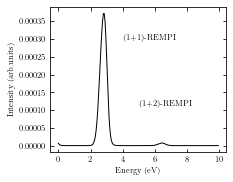

In [ ]:
plt.figure(figsize=(8/2.54,6.8/2.54))
data =np.loadtxt(dir+"timeenergyspctra.dat")
l=int(len(data[:,0])*110/150)
print(len(data[:,0]))
l=np.argmax(data[:,2])
x=data[l-10:l+90,1]
print(l)
y=data[l-10:l+90,2]
x1=np.arange(min(x),max(x),(max(x)-min(x))/200)
from scipy import interpolate
y1=interpolate.interp1d(x,y,kind='cubic')(x1)
# plt.xlim(-5, 5)
#plt.ylim(-0.009, 0.1)
plt.plot(x1,y1,'k')
plt.text(0.4*(max(x)-min(x)),0.8*(max(y)-min(y)),'(1+1)-REMPI')
plt.text(0.5*(max(x)-min(x)),0.3*(max(y)-min(y)),'(1+2)-REMPI')
#interpolation='spline16'
plt.xlabel("Energy (eV)")
plt.ylabel("Intensity (arb.units)")
plt.savefig(dir+"Energyspctra."+figureType,bbox_inches = 'tight',transparent=True,dpi=figureDPI)
plt.show()

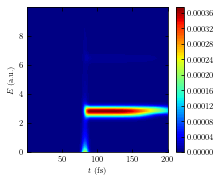

In [ ]:
plt.figure(figsize=(8/2.54,6.8/2.54))
DataAng =np.loadtxt(dir+"timeenergyspctra.dat")
#DataAng=scipy.ndimage.zoom(DataAng,1)
#plt.style.use('_mpl-gallery-nogrid')
x=DataAng[:,0]
y=DataAng[:,1]
z=DataAng[:,2]
# plt.xlim(-5, 5)
# plt.ylim(-5, 5)
ax=plt.tricontourf(x,y,z,levels,cmap='jet')

#interpolation='spline16'
plt.colorbar()
plt.xlabel("$t$ ("+timeUnit+")")
plt.ylabel("$E$ (a.u.)")
plt.savefig(dir+"timeenergyspctra."+figureType,bbox_inches = 'tight',transparent=True,dpi=figureDPI)
plt.show()

93928


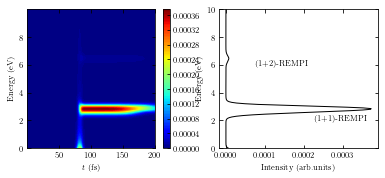

In [ ]:
plt.figure(figsize=(16/2.54,6.5/2.54))

plt.subplot(1,2,1)
DataAng =np.loadtxt(dir+"timeenergyspctra.dat")
#DataAng=scipy.ndimage.zoom(DataAng,1)
#plt.style.use('_mpl-gallery-nogrid')
x=DataAng[:,0]
y=DataAng[:,1]
z=DataAng[:,2]
# plt.xlim(-5, 5)
# plt.ylim(-5, 5)
ax=plt.tricontourf(x,y,z,levels,cmap='jet')

#interpolation='spline16'
plt.colorbar()
plt.xlabel("$t$ ("+timeUnit+")")
plt.ylabel("Energy (eV)")
plt.subplot(1,2,2)
data =np.loadtxt(dir+"timeenergyspctra.dat")
#DataAng=scipy.ndimage.zoom(DataAng,1)
#plt.style.use('_mpl-gallery-nogrid')
l=np.argmax(data[:,2])
x=data[l-10:l+90,1]
print(l)
y=data[l-10:l+90,2]
x1=np.arange(min(x),max(x),(max(x)-min(x))/200)
from scipy import interpolate
y1=interpolate.interp1d(x,y,kind='cubic')(x1)
plt.ylim(0,10)
#plt.xlim(-0.009, 0.1)
plt.plot(y1,x1,'k')
plt.text(0.2*(max(y)-min(y)),0.6*(max(x)-min(x)),'(1+2)-REMPI')
plt.text(0.6*(max(y)-min(y)),0.2*(max(x)-min(x)),'(1+1)-REMPI')
#interpolation='spline16'
plt.ylabel("Energy (eV)")
plt.xlabel("Intensity (arb.units)")
plt.savefig(dir+"timeenergyspctraplustimeend."+figureType,bbox_inches = 'tight',transparent=True,dpi=figureDPI)
plt.show()

In [ ]:
os.startfile(dir)

##  Plot orientation and alignment of the groud state

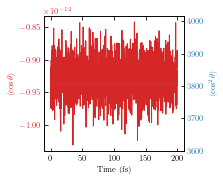

In [ ]:
data=np.loadtxt(dir+"ori_ali_1.dat")
x=data[:,0]
y1=data[:,1]
y2=data[:,2]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time ('+timeUnit+')')
ax1.set_ylabel('$\\langle{\\rm cos\\, } \\theta \\rangle$', color=color)
ax1.plot(x, y1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('$\\langle {\\rm cos^2} \\theta \\rangle$', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2,'--', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig(dir+"GroundAlignmentAndOrientation."+figureType,bbox_inches = 'tight',dpi=figureDPI)
plt.show()

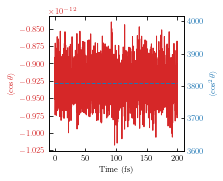

In [ ]:
data=np.loadtxt(dir+"ori_ali_2.dat")
x=data[:,0]
y1=data[:,1]
y2=data[:,2]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time ('+timeUnit+')')
ax1.set_ylabel('$\\langle{\\rm cos\\, } \\theta \\rangle$', color=color)
ax1.plot(x, y1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('$\\langle {\\rm cos^2} \\theta \\rangle$', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2,'--', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig(dir+"ExcitedAlignmentAndOrientation."+figureType,bbox_inches = 'tight',dpi=figureDPI)
plt.show()

nx=  223  ny=  50
xMax=  199.80000297725203  xMin=  0.9000000134110452  yMax=  49.0  yMin=  0.0
x[50] 1.8000000268220904
0.9000000134110452
[[9.99937837e-01 9.99936671e-01 9.99935505e-01 ... 2.99533352e-01
  2.99628712e-01 0.00000000e+00]
 [2.14905472e-12 8.33229550e-12 2.01389856e-11 ... 5.26965612e-02
  5.26296124e-02 0.00000000e+00]
 [1.58363830e-10 6.01420488e-10 1.23953698e-09 ... 4.79901214e-03
  4.76903576e-03 0.00000000e+00]
 ...
 [1.69388586e-13 3.77435844e-13 1.92021654e-13 ... 1.04296883e-12
  1.07413298e-12 0.00000000e+00]
 [9.33044150e-13 6.41231497e-13 6.14466754e-13 ... 2.21266175e-12
  2.48669169e-12 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


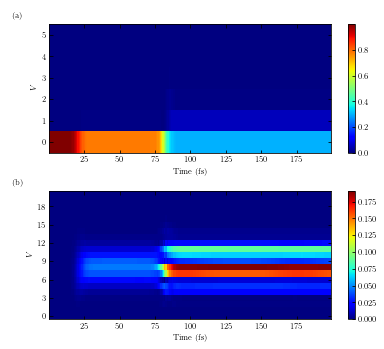

In [ ]:
from matplotlib.ticker import MaxNLocator
plt.figure(figsize=(cm_to_inch(16),cm_to_inch(13)))
ax1=plt.subplot(2,1,1)
DataPop =np.loadtxt(dir+"p_vgr_v.dat")
#plt.style.use('_mpl-gallery-nogrid')
x=DataPop[:,0]
y=DataPop[:,1]
z=DataPop[:,2]
ny=int((max(y)-min(y))/(y[2]-y[1]))+1
nx=int((max(x)-min(x))/(x[ny]-x[0]))+1+1
zMesh=np.zeros((ny,nx))
for i in range(1,nx):
    for j in range(1,ny):
        zMesh[j-1,i-1]=z[(i-1)*ny+j-1]
print('nx= ',nx,' ny= ',ny)
print('xMax= ',max(x),' xMin= ',min(x),' yMax= ',max(y),' yMin= ',min(y))
print('x[50]',x[50])
print(x[0])
print(zMesh)
xMesh=np.linspace(min(x),max(x),nx)
yMesh=np.linspace(min(y),max(y),ny)
#xx,yy,zz=np.meshgrid(xMesh,yMesh,zMesh)
plt.pcolormesh(xMesh,yMesh,zMesh,cmap='jet')
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
setlabel(ax1,"(a)")
plt.xlim(x[0]/2,max(x)-x[0])
plt.ylim(-0.5,5.5)
plt.xlabel('Time ('+timeUnit+')')
plt.ylabel('$V$')
plt.colorbar()
ax2=plt.subplot(2,1,2)
DataPop =np.loadtxt(dir+"p_exc_v.dat")
#plt.style.use('_mpl-gallery-nogrid')
x=DataPop[:,0]
y=DataPop[:,1]
z=DataPop[:,2]
ny=int((max(y)-min(y))/(y[2]-y[1]))+1
nx=int((max(x)-min(x))/(x[ny]-x[0]))+1
zMesh=np.zeros((ny,nx))
for i in range(1,nx):
    for j in range(1,ny):
        zMesh[j-1,i-1]=z[(i-1)*ny+j-1]
# print('nx= ',nx,' ny= ',ny)
# print('xMax= ',max(x),' xMin= ',min(x),' yMax= ',max(y),' yMin= ',min(y))
# print('x[50]',x[50])
# print(x[0])
# print(zMesh)
xMesh=np.linspace(min(x),max(x),nx)
yMesh=np.linspace(min(y),max(y),ny)
#xx,yy,zz=np.meshgrid(xMesh,yMesh,zMesh)
plt.pcolormesh(xMesh,yMesh,zMesh,cmap='jet')
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))
setlabel(ax2,"(b)")
plt.xlabel('Time ('+timeUnit+')')
plt.ylabel('$V$')
plt.xlim(x[0]/2,max(x)-x[0])
plt.ylim(-0.5,20.5)
plt.colorbar()
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.3)
plt.savefig(dir+"P_v."+figureType,bbox_inches = 'tight',dpi=figureDPI)

3807.73109244 3807.73109244


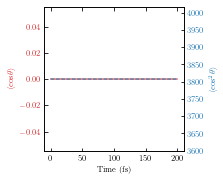

In [ ]:
if os.path.exists(dir+"cos1.dat"):
    data=np.loadtxt(dir+"cos1.dat")
else:
    data=np.loadtxt(dir+"orientationAndAlignment.dat")

x=data[:,0]
y1=data[:,1]
y2=data[:,2]
print(max(y2),min(y2))
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Time ('+timeUnit+')')
ax1.set_ylabel('$\\langle{\\rm  cos} \\theta \\rangle$', color=color)
ax1.plot(x, y1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('$\\langle{\\rm cos^2} \\theta \\rangle$', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2,'--', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig(dir+"OrientationAndAlignment."+figureType,bbox_inches = 'tight',dpi=figureDPI)
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_5828\2138758981.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(outDir+'EnergyRJV.'+figureType,bbox_inches ='tight',dpi=figureDPI)
c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


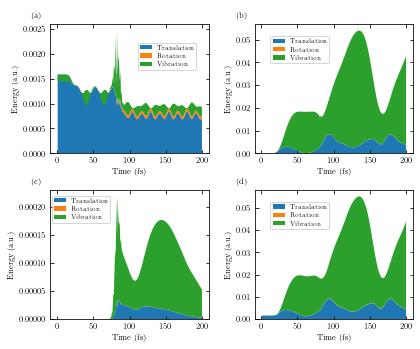

In [ ]:
plt.figure(tight_layout=True,figsize=((8*2/2.54),(6.5*2/2.54)))
ax1=plt.axes([0.10,0.55,0.35,0.35])
setlabel(ax1,'(a)')
data=np.loadtxt(dir+'eneTRJVgro.dat')
t = data[:,0]
outDir=dir
population_by_continent = {
        'Translation': data[:,1],
        'Rotation':  data[:,2],
        'Vibration': data[:,3],
}
# fig, ax = plt.subplots()
plt.stackplot(t, population_by_continent.values(),
             labels=population_by_continent.keys(), alpha=1)
plt.legend(loc=(0.55,0.65),fontsize=6)
#ax.set_title('World population')
plt.xlabel('Time (fs)')
plt.ylabel('Energy (a.u.)')
ax2=plt.axes([0.55,0.55,0.35,0.35])
setlabel(ax2,'(b)')
data=np.loadtxt(dir+'eneTRJVexc.dat')
t = data[:,0]
outDir=dir
population_by_continent = {
    'Translation': data[:,1],
    'Rotation':  data[:,2],
    'Vibration':  data[:,3],
}
# fig, ax = plt.subplots()
plt.stackplot(t, population_by_continent.values(),
             labels=population_by_continent.keys(), alpha=1)
plt.legend(loc=(0.1,0.7),fontsize=6)
#ax.set_title('World population')
plt.xlabel('Time (fs)')
plt.ylabel('Energy (a.u.)')

ax3=plt.axes([0.10,0.10,0.35,0.35])
setlabel(ax3,'(c)')
data=np.loadtxt(dir+'eneTRJVion.dat')
t = data[:,0]
outDir=dir
population_by_continent = {
    'Translation': data[:,1],
    'Rotation':  data[:,2],
    'Vibration':  data[:,3],
}
# fig, ax = plt.subplots()
plt.stackplot(t, population_by_continent.values(),
             labels=population_by_continent.keys(), alpha=1)
plt.legend(loc=(0.01,0.75),fontsize=6)
#ax.set_title('World population')
plt.xlabel('Time (fs)')
plt.ylabel('Energy (a.u.)')
ax4=plt.axes([0.55,0.10,0.35,0.35])
setlabel(ax4,'(d)')
data1=np.loadtxt(dir+'eneTRJVgro.dat')
data2=np.loadtxt(dir+'eneTRJVexc.dat')
data3=np.loadtxt(dir+'eneTRJVion.dat')
t = data[:,0]
outDir=dir
population_by_continent = {
    'Translation': data1[:,1]+data2[:,1]+data3[:,1],
    'Rotation':  data1[:,2]+data2[:,2]+data3[:,2],
    'Vibration':  data1[:,3]+data2[:,3]+data3[:,3],
}

plt.stackplot(t, population_by_continent.values(),
             labels=population_by_continent.keys(), alpha=1)
plt.legend(loc=(0.1,0.7),fontsize=6)
#ax.set_title('World population')
plt.xlabel('Time (fs)')
plt.ylabel('Energy (a.u.)')
plt.savefig(outDir+'EnergyRJV.'+figureType,bbox_inches ='tight',dpi=figureDPI)
plt.show()

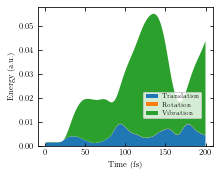

In [ ]:

data1=np.loadtxt(dir+'eneTRJVgro.dat')
data2=np.loadtxt(dir+'eneTRJVexc.dat')
data3=np.loadtxt(dir+'eneTRJVion.dat')
t = data[:,0]
outDir=dir
population_by_continent = {
    'Translation': data1[:,1]+data2[:,1]+data3[:,1],
    'Rotation':  data1[:,2]+data2[:,2]+data3[:,2],
    'Vibration':  data1[:,3]+data2[:,3]+data3[:,3],
}
fig, ax = plt.subplots()
ax.stackplot(t, population_by_continent.values(),
             labels=population_by_continent.keys(), alpha=1)
ax.legend(loc=(0.6,0.2),fontsize=6)
#ax.set_title('World population')
ax.set_xlabel('Time (fs)')
ax.set_ylabel('Energy (a.u.)')

plt.savefig(outDir+'EnergyRJVtot.'+figureType,bbox_inches ='tight',dpi=figureDPI)
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_5828\642807113.py:46: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(left=0.1,


<Figure size 680.315x552.756 with 0 Axes>

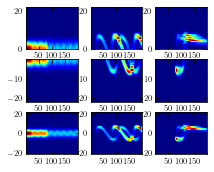

In [ ]:
plt.figure(figsize=(24/2.54,19.5/2.54))
intDir=dir
outDir=dir
fig = plt.figure(constrained_layout=True)
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(3, 3)
data=np.loadtxt(intDir+'kneg.dat')
x=data[:,0]
y=data[:,1]
z1=data[:,2]
z2=data[:,3]
z3=data[:,4]
ax11 = fig.add_subplot(gs[0,0])
ax11.tricontourf(x,y,z1,levels,cmap='jet')
# plt.ylim(-5.5,max(y))
ax21 = fig.add_subplot(gs[0,1])
ax21.tricontourf(x,y,z2,levels,cmap='jet')
ax31 = fig.add_subplot(gs[0,2])
ax31.tricontourf(x,y,z3,levels,cmap='jet')

data=np.loadtxt(intDir+'kpos.dat')
x=data[:,0]
y=data[:,1]
z1=data[:,2]
z2=data[:,3]
z3=data[:,4]
ax12 = fig.add_subplot(gs[1,0])
ax12.tricontourf(x,y,z1,levels,cmap='jet')
ax22 = fig.add_subplot(gs[1,1])
ax22.tricontourf(x,y,z2,levels,cmap='jet')
ax32 = fig.add_subplot(gs[1,2])
ax32.tricontourf(x,y,z3,levels,cmap='jet')
# plt.ylim(min(y),5.5)
data=np.loadtxt(intDir+'ktot.dat')
x=data[:,0]
y=data[:,1]
z1=data[:,2]
z2=data[:,3]
z3=data[:,4]
ax13= fig.add_subplot(gs[2,0])
ax13.tricontourf(x,y,z1,levels,cmap='jet')
ax23= fig.add_subplot(gs[2,1])
ax23.tricontourf(x,y,z2,levels,cmap='jet')
ax33= fig.add_subplot(gs[2,2])
ax33.tricontourf(x,y,z3,levels,cmap='jet')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.25)
plt.savefig(outDir+'Ks.'+figureType,bbox_inches ='tight',dpi=figureDPI)

plt.show()



<Figure size 226.772x184.252 with 0 Axes>

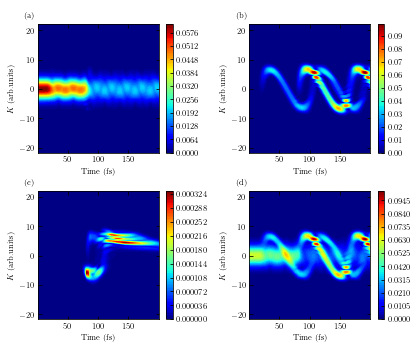

In [ ]:
intDir=dir
fig = plt.figure(constrained_layout=True)
plt.figure(figsize=(16/2.54,13/2.54))
data=np.loadtxt(intDir+'ktot.dat')
x=data[:,0]
y=data[:,1]
z1=data[:,2]
z2=data[:,3]
z3=data[:,4]
z4=z1+z2+z3

ax=plt.subplot(2,2,1)
plt.tricontourf(x,y,z1,levels,cmap='jet')
plt.colorbar()
setlabel(ax,'(a)')
plt.xlabel('Time (fs)')
plt.ylabel('$K$ (arb.units)')
ax=plt.subplot(2,2,2)
plt.tricontourf(x,y,z2,levels,cmap='jet')
plt.colorbar()
setlabel(ax,'(b)')
plt.xlabel('Time (fs)')
plt.ylabel('$K$ (arb.units)')
ax=plt.subplot(2,2,3)
plt.tricontourf(x,y,z3,levels,cmap='jet')
plt.colorbar()
setlabel(ax,'(c)')
plt.xlabel('Time (fs)')
plt.ylabel('$K$ (arb.units)')
ax=plt.subplot(2,2,4)
plt.tricontourf(x,y,z4,levels,cmap='jet')
plt.colorbar()
setlabel(ax,'(d)')
plt.xlabel('Time (fs)')
plt.ylabel('$K$ (arb.units)')
#plt.ylim(-5.5,5.5)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.3)
plt.savefig(outDir+'Ktot.'+figureType,bbox_inches ='tight',dpi=figureDPI)
plt.show()

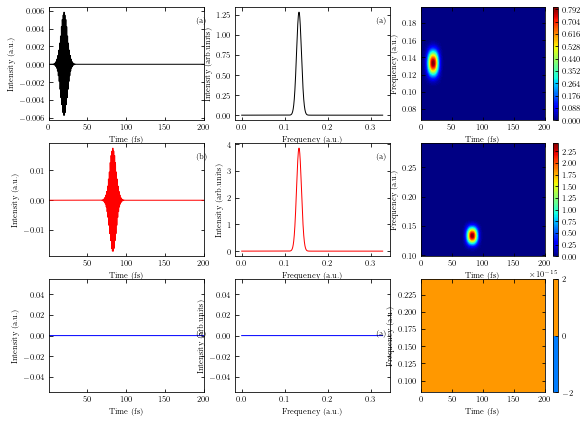

In [ ]:
if os.path.exists(dir+"TimFreDis1.dat"):
    plt.figure(figsize=(24/2.54,18/2.54))
    data=np.loadtxt(dir+"Laser.dat")


    x1=data[:,0]
    y1=data[:,1]
    y2=data[:,2]
    y3=data[:,3]

    plt.subplot(3,3,1)
    #plt.grid(False)
    x=x1
    y=y1
    plt.text(min(x)+(max(x)-min(x))*0.95,min(y)+(max(y)-min(y))*0.9,"(a)")
    plt.xlabel('Time ('+timeUnit+')')
    plt.ylabel("Intensity (a.u.)")
    plt.xlim(TimeBegin,TimeEnd)
    plt.plot(x1,y1,'k-')

    plt.subplot(3,3,2)
    dataf=np.loadtxt(dir+"FreDis1.dat")
    x=dataf[:,0]
    y=dataf[:,1]
    #plt.grid(False)
    plt.text(min(x)+(max(x)-min(x))*0.95,min(y)+(max(y)-min(y))*0.9,"(a)")
    plt.xlabel('Frequency (a.u.)')
    plt.ylabel("Intensity (arb.units)")
    plt.plot(x,y,'k-')

    plt.subplot(3,3,3)
    dataf=np.loadtxt(dir+"TimFreDis1.dat")
    x=dataf[:,0]
    y=dataf[:,1]
    z=dataf[:,2]
    plt.tricontourf(x,y,z,levels,cmap='jet')
    plt.colorbar()
    plt.xlabel('Time ('+timeUnit+')')
    plt.ylabel('Frequency (a.u.)')

    plt.subplot(3,3,4)
    #plt.grid(False)
    #plt.title("(b)",loc="left")
    plt.xlabel('Time ('+timeUnit+')')
    plt.ylabel("Intensity (a.u.)")
    plt.xlim(TimeTurn,TimeEnd)
    plt.plot(x1,y2,'r-')
    x=x1
    y=y2
    plt.text(TimeTurn+(TimeEnd-TimeTurn)*0.95,min(y)+(max(y)-min(y))*0.9,"(b)")
    plt.subplot(3,3,5)
    dataf=np.loadtxt(dir+"FreDis2.dat")
    x=dataf[:,0]
    y=dataf[:,1]
    #plt.grid(False)
    plt.text(min(x)+(max(x)-min(x))*0.95,min(y)+(max(y)-min(y))*0.9,"(a)")
    plt.xlabel('Frequency (a.u.)')
    plt.ylabel("Intensity (arb.units)")
    plt.plot(x,y,'r-')

    plt.subplot(3,3,6)
    dataf=np.loadtxt(dir+"TimFreDis2.dat")
    x=dataf[:,0]
    y=dataf[:,1]
    z=dataf[:,2]
    plt.tricontourf(x,y,z,levels,cmap='jet')
    plt.colorbar()
    plt.xlabel('Time ('+timeUnit+')')
    plt.ylabel('Frequency (a.u.)')
    plt.subplot(3,3,7)
    #plt.grid(False)
    x=x1
    y=y3
    plt.text(TimeTurn+(TimeEnd-TimeTurn)*0.95,min(y)+(max(y)-min(y))*0.9,"(c)")

    plt.xlabel('Time ('+timeUnit+')')
    plt.ylabel("Intensity (a.u.)")
    plt.xlim(TimeTurn,TimeEnd)
    plt.plot(x1,y3,'b-')
    plt.subplot(3,3,8)
    dataf=np.loadtxt(dir+"FreDis3.dat")
    x=dataf[:,0]
    y=dataf[:,1]
    #plt.grid(False)
    plt.text(min(x)+(max(x)-min(x))*0.95,min(y)+(max(y)-min(y))*0.9,"(a)")
    plt.xlabel('Frequency (a.u.)')
    plt.ylabel("Intensity (arb.units)")
    plt.plot(x,y,'b-')
    plt.subplot(3,3,9)
    dataf=np.loadtxt(dir+"TimFreDis3.dat")
    x=dataf[:,0]
    y=dataf[:,1]
    z=dataf[:,2]
    plt.xlabel('Time ('+timeUnit+')')
    plt.ylabel('Frequency (a.u.)')
    plt.tricontourf(x,y,z,levels,cmap='jet')
    plt.colorbar()
    plt.savefig(dir+"TimFreDis."+figureType,dpi=figureDPI)

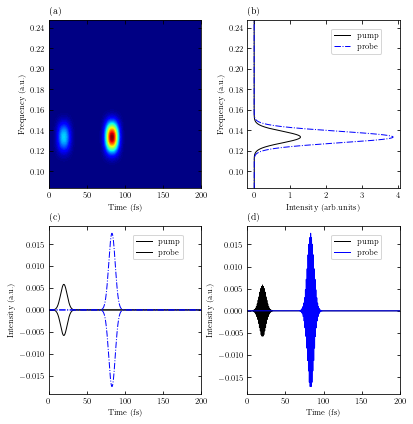

In [ ]:
if os.path.exists(dir+'FreDis1.dat'):
    legengLoc=(0.55,0.8)
    plt.figure(figsize=((16/2.54),(13/2)))
    #plt.figure(figsize=(8,6))
    titleLoc="left"
    plt.subplot(2,2,1)
    plt.title("(a)",loc=titleLoc)
    data=np.loadtxt(dir+"TimFreDis4.dat")
    x=data[:,0]
    y=data[:,1]
    z=data[:,2]
    plt.xlabel("Time (fs)")
    plt.ylabel("Frequency (a.u.)")
    plt.tricontourf(x,y,z,100,cmap='jet')
    #plt.colorbar()
    plt.subplot(2,2,2)
    plt.title("(b)",loc=titleLoc)
    data1=np.loadtxt(dir+"FreDis1.dat")
    data2=np.loadtxt(dir+"FreDis2.dat")
    data3=np.loadtxt(dir+"FreDis3.dat")
    x1=data1[:,0]
    y1=data1[:,1]
    x2=data2[:,0]
    y2=data2[:,1]
    x3=data3[:,0]
    y3=data3[:,1]
    plt.xlabel("Intensity (arb.units)") 
    plt.ylabel("Frequency (a.u.)")
    #plt.xlim(0,5)
    plt.ylim(min(np.loadtxt(dir+"TimFreDis4.dat")[:,1]),max(np.loadtxt(dir+"TimFreDis4.dat")[:,1]))
    plt.plot(y1,x1,"k-",y2,x2,'b-.')
    #plt.legend(["P 1","P 2","P 3"],loc=legengLoc)
    plt.legend(["pump","probe"],loc=legengLoc)
    plt.subplot(2,2,3)
    data=np.loadtxt(dir+"Laser.dat")
    x=data[:,0]
    y1=data[:,4]
    y2=data[:,5]
    y3=data[:,6]
    plt.xlim(min(x),max(x))
    plt.title("(c)",loc=titleLoc)
    plt.plot(x,y1,'k-',x,-y1,'k-',x,y2,'b-.',x,-y2,'b-.')
    plt.xlabel("Time (fs)")
    plt.ylabel("Intensity (a.u.)")
    #plt.legend(["P 1","P 2","P 3"],loc=legengLoc)
    plt.legend(["pump","probe"],loc=legengLoc)
    plt.subplot(2,2,4)
    plt.title("(d)",loc=titleLoc)
    data=np.loadtxt(dir+"Laser.dat")
    x1=data[:,0]
    y1=data[:,1]
    y2=data[:,2]
    y3=data[:,3]
    plt.xlim(min(x),max(x))
    plt.xlabel("Time (fs)")
    plt.ylabel("Intensity (a.u.)")

    plt.plot(x1,y1,'k-',x,y2,'b-',)
    #plt.legend(["P 1","P 2","P 3"],loc=legengLoc)
    plt.legend(["pump","probe"],loc=legengLoc)


    plt.subplots_adjust(left=0.125,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.3, 
                        hspace=0.22)
    plt.savefig(dir+"TimeFrequencyDistribution."+figureType,bbox_inches = 'tight',dpi=figureDPI)

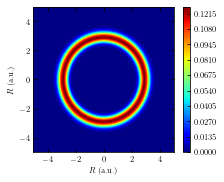

In [ ]:
import scipy.ndimage
plt.figure(figsize=(8/2.54,6.8/2.54))
if os.path.exists(dir+"wave2d.dat"):
    DataAng =np.loadtxt(dir+"wave2d.dat")
else:   
    DataAng =np.loadtxt(dir+"InitialWavePacket.dat")
#DataAng=scipy.ndimage.zoom(DataAng,1)
#plt.style.use('_mpl-gallery-nogrid')
x=DataAng[:,0]
y=DataAng[:,1]
z=DataAng[:,2]
plt.xlim(-5, 5)
plt.ylim(-5, 5)
ax=plt.tricontourf(x,y,z,levels,cmap='jet')

#interpolation='spline16'
plt.colorbar()
plt.xlabel("$\tR$ (a.u.)")
plt.ylabel("$\tR$ (a.u.)")
#plt.savefig(dir+"InitialWavePacket."+figureType,bbox_inches = 'tight',transparent=True,dpi=figureDPI)
plt.show()

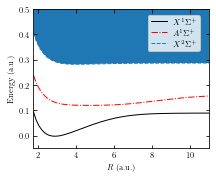

In [ ]:
if os.path.exists(dir+'pott.dat'):
    data=np.loadtxt(dir+"Pott.dat")
else:
    data=np.loadtxt(dir+"PotentialEnergy.dat")

x=data[:,0]
y1=data[:,1]
y2=data[:,2]
y3=data[:,3]
plt.xlabel("$\t{R}$ (a.u.) ")
plt.ylabel("Energy (a.u.)")
plt.plot(x,y1,'k-',x,y2,'r-.',x,y3,'--')
plt.ylim(-0.05,0.5)
plt.xlim(1.75,11.)
plt.fill_between(x,y3,x,y3+0.2)
plt.legend(['$X^1\Sigma^+$','$A^1 \Sigma ^+$','$X^2 \Sigma ^+$'],loc=(0.65,0.7))
plt.savefig(dir+"pott."+figureType,bbox_inches="tight",transparent=True,dpi=figureDPI)

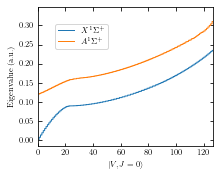

In [ ]:
if os.path.exists(dir+'InitialEigenvalue.dat'):
    data=np.loadtxt(dir+'InitialEigenvalue.dat')
elif os.path.exists(dir+'eig.dat'):
    data=np.loadtxt(dir+'eig.dat')
x=data[:,0]
y1=data[:,1]
y2=data[:,2]
plt.step(x,y1,x,y2)
plt.xlim(0,127)
plt.xlabel('$|V,J=0\\rangle$')
plt.ylabel('Eigenvalue (a.u.)')
plt.legend(['$X^1\Sigma^+$','$A^1 \Sigma ^+$'],loc=(0.1,0.7))
plt.savefig(dir+"EigenvalueOfVib."+figureType,bbox_inches="tight",transparent=True,dpi=figureDPI)
plt.show()

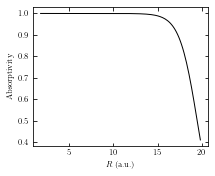

In [ ]:
if os.path.exists(dir+'absb.dat'):
    data=np.loadtxt(dir+'Absb.dat') #get data form dir+'absb.dat'
else:
    data=np.loadtxt(dir+'Absorption.dat')
x=data[:,0]
y1=data[:,1]
plt.xlabel("$\t{R}$ (a.u.) ")
plt.ylabel("Absorptivity")
#x=x
#y=y1
#plt.text(min(x)+(max(x)-min(x))*0.95,min(y)+(max(y)-min(y))*0.95,"(a)")
plt.plot(x,y1,'k-')
#plt.savefig(dir+"Absorption."+figureType,bbox_inches="tight",transparent=True,dpi=figureDPI)
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_5828\144559897.py:3: UserWarning: loadtxt: Empty input file: "D:\doc\data\ion1test\twopump\2083\qua_int_ang.dat"
  data=np.loadtxt(dir+"qua_int_ang.dat")


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

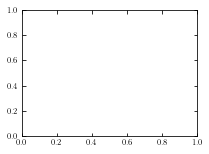

In [ ]:
plt.figure(figsize=(8/2.54,13/2.54))
plt.subplot(2,1,1)
data=np.loadtxt(dir+"qua_int_ang.dat")
x=data[:,0]
y=data[:,1]
z1=data[:,2]
z2=data[:,3]
plt.tricontourf(x,y,z1,levels,cmap='jet')
plt.colorbar()
plt.xlim(TimeTurn,TimeEnd)
plt.subplot(2,1,2)
plt.tricontourf(x,y,z2,levels,cmap='jet')
plt.colorbar()
plt.xlim(TimeTurn,TimeEnd)
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.2)
plt.savefig(dir+"QuaIntAng."+figureType,bbox_inches = 'tight',transparent=True,dpi=figureDPI)
plt.show()

In [ ]:
plt.figure(figsize=(8/2.54,13/2.54))
data=np.loadtxt(dir+"qua_int_rad.dat")
x=data[:,0]
y=data[:,1]
z1=data[:,2]
z2=data[:,3]
plt.subplot(2,1,1)
plt.tricontourf(x,y,z1,levels,cmap='jet')#,vmin=0.0,vmax=0.1)
plt.colorbar()
plt.xlim(TimeTurn,TimeEnd)
plt.ylim(min(y),11)
plt.subplot(2,1,2)
plt.tricontourf(x,y,z2,levels,cmap='jet')
plt.colorbar()
plt.xlim(TimeTurn,TimeEnd)
plt.ylim(min(y),11)
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.2)
plt.savefig(dir+"QuaIntRad."+figureType,bbox_inches = 'tight',transparent=True,dpi=figureDPI)
plt.show()

In [ ]:
return

In [ ]:
plt.figure(figsize=((16/2.54),(13/2.54)))
from matplotlib.ticker import MaxNLocator
#timeP="20"
fileList =os.listdir(dir+"p_vgr_vj\\")
print(fileList)
image_list=list()
print("Checking image list")
n=len(fileList)
for ii in range(n):
    s1=dir+"p_vgr_vj\\"+str(fileList[ii])
    s2=dir+"p_exc_vj\\"+str(fileList[ii])
    ax1=plt.subplot(1,2,1)
    DataPop =np.loadtxt(s1)
    #plt.style.use('_mpl-gallery-nogrid')
    x=DataPop[:,0]
    y=DataPop[:,1]
    z=DataPop[:,2]
    ny=int((max(y)-min(y))/(y[2]-y[1]))+1
    nx=int((max(x)-min(x))/(x[ny]-x[0]))+1
    zMesh=np.zeros((ny,nx))
    for i in range(1,nx):
        for j in range(1,ny):
            zMesh[j-1,i-1]=z[(i-1)*ny+j-1]
    print('nx= ',nx,' ny= ',ny)
    print('xMax= ',max(x),' xMin= ',min(x),' yMax= ',max(y),' yMin= ',min(y))
    print('x[50]',x[50])
    print(x[0])
    print(zMesh)
    xMesh=np.linspace(min(x),max(x),nx)
    yMesh=np.linspace(min(y),max(y),ny)
    #xx,yy,zz=np.meshgrid(xMesh,yMesh,zMesh)
    plt.pcolormesh(xMesh,yMesh,zMesh,cmap='jet')
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlim(-0.5,19.5)
    plt.ylim(-0.5,19.5)
    plt.xlabel('$V$')
    plt.ylabel('$J$')
    plt.title("(a) Ground state, $t$ = "+fileList[ii][11:17]+" fs",loc='left')
    plt.colorbar()
    ax2=plt.subplot(1,2,2)
    DataPop =np.loadtxt(s2)
    #plt.style.use('_mpl-gallery-nogrid')
    x=DataPop[:,0]
    y=DataPop[:,1]
    z=DataPop[:,2]
    ny=int((max(y)-min(y))/(y[2]-y[1]))+1
    nx=int((max(x)-min(x))/(x[ny]-x[0]))+1
    zMesh=np.zeros((ny,nx))
    for i in range(1,nx):
        for j in range(1,ny):
            zMesh[j-1,i-1]=z[(i-1)*ny+j-1]
    print('nx= ',nx,' ny= ',ny)
    print('xMax= ',max(x),' xMin= ',min(x),' yMax= ',max(y),' yMin= ',min(y))
    print('x[50]',x[50])
    print(x[0])
    print(zMesh)
    xMesh=np.linspace(min(x),max(x),nx)
    yMesh=np.linspace(min(y),max(y),ny)
    #xx,yy,zz=np.meshgrid(xMesh,yMesh,zMesh)
    plt.pcolormesh(xMesh,yMesh,zMesh,cmap='jet')
    ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax2.yaxis.set_major_locator(MaxNLocator(integer=True))
    plt.title("(b) Excited state, $t$ = "+fileList[ii][11:17]+" fs",loc='left')
    plt.xlabel('$V$')
    plt.ylabel('$J$')
    plt.xlim(-0.5,19.5)
    plt.ylim(-0.5,19.5)
    plt.colorbar()
    plt.subplots_adjust(left=0.125,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.25, 
                        hspace=0.2)
    plt.savefig(dir+"p_vgr_vj\\"+fileList[ii][:17]+"."+figureType,bbox_inches = 'tight',dpi=figureDPI)


In [ ]:
import  imageio
import os
def compose_gif(image_list,gif_name,myduration):
    frames=[]
    for image_name in image_list:
        frames.append(imageio.imread(image_name))
    imageio.mimsave(gif_name,frames,'GIF',duration=myduration)
    
    return
    
gif_name = "P_VJ.gif"
fileList =os.listdir(dir+"p_vgr_vj\\")
print(fileList)
image_list=list()
print("Checking image list")
n=len(fileList)
for i in range(n):
    s=dir+"p_vgr_vj\\"+str(fileList[i])
    if s[-5:]==".jpeg":
        image_list.append(s)
        
        
print(image_list)
myduration=0.3#eval(input("duration: s"))
compose_gif(image_list,dir+gif_name,myduration)
print("Created")    

In [ ]:
fileList =os.listdir(dir+"wave\\")
print(fileList)
dat_list=list()
print("Checking image list")
n=len(fileList)
for i in range(n):
    s=dir+"wave\\"+str(fileList[i])
    if s[-4:]==".dat":
        dat_list.append(s)
        
        
print(dat_list)
for i in range(n):
    
    data=np.loadtxt(dat_list[i])
    x=data[:,0]
    y=data[:,1]
    z1=data[:,2]
    z2=data[:,3]
    z3=data[:,4]
    z4=z1+z2+z3

    plt.figure(figsize=(16/2.54,12.5/2.54))
    
    #fig=plt.subplots(2,2)
    #fig.title("$t$ = "+fileList[i][11:13]+" fs")
    plt.subplot(2,2,1)
    plt.tricontourf(x,y,z1,levels,cmap='jet')
    plt.title('(a)',loc='left')
    plt.xlim(-11,11)
    plt.ylim(-11,11)
    plt.xlabel("$R$ (a.u.)")
    plt.ylabel("$R$ (a.u.)")
    plt.colorbar()
    plt.subplot(2,2,2)
    plt.tricontourf(x,y,z2,levels,cmap='jet')
    plt.title('(b)',loc='left')
    plt.xlim(-11,11)
    plt.ylim(-11,11)
    plt.xlabel("$R$ (a.u.)")
    plt.ylabel("$R$ (a.u.)")
    plt.colorbar()
    plt.subplot(2,2,3)
    plt.tricontourf(x,y,z3,levels,cmap='jet')
    plt.title('(c)',loc='left')
    plt.colorbar()
    plt.xlim(-11,11)
    plt.ylim(-11,11)
    plt.xlabel("$R$ (a.u.)")
    plt.ylabel("$R$ (a.u.)")
    plt.subplot(2,2,4)
    plt.tricontourf(x,y,z4,levels,cmap='jet')
    plt.title('(d)',loc='left')
    plt.xlim(-11,11)
    plt.ylim(-11,11)
    plt.xlabel("$R$ (a.u.)")
    plt.ylabel("$R$ (a.u.)")
    plt.colorbar()
    plt.subplots_adjust(left=0.125,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.3, 
                        hspace=0.3)
    plt.savefig(dir+"wave\\"+fileList[i][:16]+"."+figureType,bbox_inches = 'tight',dpi=figureDPI)
    plt.show()
 


In [ ]:

fileList =os.listdir(dir+"PAD\\")
print(fileList)
dat_list=list()
print("Checking image list")
n=len(fileList)
for i in range(n):
    s=dir+"PAD\\"+str(fileList[i])
    if s[-4:]==".dat":
        dat_list.append(s)
        
        
print(dat_list)
for i in range(n):
    
    data=np.loadtxt(dat_list[i])
    x=data[:,2]
    y=data[:,3]
    z=data[:,4]
  
    #fig=plt.subplots(2,2)
    #fig.title("$t$ = "+fileList[i][11:13]+" fs")
    plt.tricontourf(x,y,z,levels,cmap='jet')
    plt.title('$t$ = '+fileList[i][13:16]+' fs',loc='left')
    plt.xlabel("$\\theta$ (degree)")
    plt.ylabel("Energy (a.u.)")
    plt.colorbar()
  
    plt.savefig(dir+"PAD\\"+fileList[i][:16]+"."+figureType,bbox_inches = 'tight',dpi=figureDPI)
    plt.show()
 


In [ ]:
gif_name = "Wave.gif"
fileList =os.listdir(dir+"wave\\")
print(fileList)
image_list=list()
print("Checking image list")
n=len(fileList)
for i in range(n):
    s=dir+"wave\\"+str(fileList[i])
    if s[-5:]==".jpeg":
        image_list.append(s)
        
        
print(image_list)
myduration=0.3#eval(input("duration: s"))
compose_gif(image_list,dir+gif_name,myduration)
print("Created")   

In [ ]:
r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(False)
ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()